In [32]:
import pandas as pd
import numpy as np

## Columns

In [33]:
columns = [
    'frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_epoch', 'frame.time_delta',
    'frame.time_delta_displayed', 'frame.time_relative', 'frame.len', 'frame.cap_len', 'frame.marked',
    'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 'radiotap.present.tsft',
    'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 'radiotap.present.fhss',
    'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality',
    'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power',
    'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags',
    'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.reserved',
    'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime', 'radiotap.flags.cfp',
    'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 'radiotap.flags.fcs', 'radiotap.flags.datapad',
    'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 'radiotap.datarate', 'radiotap.channel.freq', 'radiotap.channel.type.turbo',
    'radiotap.channel.type.cck', 'radiotap.channel.type.ofdm', 'radiotap.channel.type.2ghz', 'radiotap.channel.type.5ghz',
    'radiotap.channel.type.passive', 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm',
    'radiotap.channel.type.sturbo', 'radiotap.channel.type.half', 'radiotap.channel.type.quarter', 'radiotap.dbm_antsignal',
    'radiotap.antenna', 'radiotap.rxflags.badplcp', 'wlan.fc.type_subtype', 'wlan.fc.version', 'wlan.fc.type', 'wlan.fc.subtype',
    'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 'wlan.fc.protected', 'wlan.fc.order',
    'wlan.duration', 'wlan.ra', 'wlan.da', 'wlan.ta', 'wlan.sa', 'wlan.bssid', 'wlan.frag', 'wlan.seq', 'wlan.bar.type',
    'wlan.ba.control.ackpolicy', 'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap', 'wlan.bar.compressed.tidinfo', 'wlan.ba.bm',
    'wlan.fcs_good', 'wlan_mgt.fixed.capabilities.ess', 'wlan_mgt.fixed.capabilities.ibss', 'wlan_mgt.fixed.capabilities.cfpoll.ap',
    'wlan_mgt.fixed.capabilities.privacy', 'wlan_mgt.fixed.capabilities.preamble', 'wlan_mgt.fixed.capabilities.pbcc',
    'wlan_mgt.fixed.capabilities.agility', 'wlan_mgt.fixed.capabilities.spec_man', 'wlan_mgt.fixed.capabilities.short_slot_time',
    'wlan_mgt.fixed.capabilities.apsd', 'wlan_mgt.fixed.capabilities.radio_measurement', 'wlan_mgt.fixed.capabilities.dsss_ofdm',
    'wlan_mgt.fixed.capabilities.del_blk_ack', 'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival',
    'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp', 'wlan_mgt.fixed.beacon', 'wlan_mgt.fixed.aid',
    'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth.alg', 'wlan_mgt.fixed.auth_seq', 'wlan_mgt.fixed.category_code', 'wlan_mgt.fixed.htact',
    'wlan_mgt.fixed.chanwidth', 'wlan_mgt.fixed.fragment', 'wlan_mgt.fixed.sequence', 'wlan_mgt.tagged.all', 'wlan_mgt.ssid',
    'wlan_mgt.ds.current_channel', 'wlan_mgt.tim.dtim_count', 'wlan_mgt.tim.dtim_period', 'wlan_mgt.tim.bmapctl.multicast',
    'wlan_mgt.tim.bmapctl.offset', 'wlan_mgt.country_info.environment', 'wlan_mgt.rsn.version', 'wlan_mgt.rsn.gcs.type', 'wlan_mgt.rsn.pcs.count',
    'wlan_mgt.rsn.akms.count', 'wlan_mgt.rsn.akms.type', 'wlan_mgt.rsn.capabilities.preauth', 'wlan_mgt.rsn.capabilities.no_pairwise',
    'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 'wlan_mgt.rsn.capabilities.gtksa_replay_counter', 'wlan_mgt.rsn.capabilities.mfpr',
    'wlan_mgt.rsn.capabilities.mfpc', 'wlan_mgt.rsn.capabilities.peerkey', 'wlan_mgt.tcprep.trsmt_pow', 'wlan_mgt.tcprep.link_mrg',
    'wlan.wep.iv', 'wlan.wep.key', 'wlan.wep.icv', 'wlan.tkip.extiv', 'wlan.ccmp.extiv', 'wlan.qos.tid', 'wlan.qos.priority', 'wlan.qos.eosp',
    'wlan.qos.ack', 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated', 'wlan.qos.bit4', 'wlan.qos.txop_dur_req', 'wlan.qos.buf_state_indicated',
    'data.len', 'class'
]

In [36]:
data = pd.read_csv(
    "/kaggle/input/802-11-network-attack-detection/dataset.csv",
    sep=',',
    header=None)

# Set the column headers to the names from the Wireshark frame
data.columns = columns

### Preprocess our minimized dataset ###

# Remove NULL values from our dataset

# Replace the '?' string in the DataFrame with a NumPy NaN value
data = data.replace('?', np.nan)

# If over 60% of the values in a column is null, remove it
prev_num_cols = len(data.columns)
data.dropna(axis='columns', thresh=len(data.index) * 0.40, inplace=True)
print("Removed " + str(prev_num_cols - len(data.columns)) +
      " columns with all NaN values.")

# Remove columns with no variation (zero values or only one unique value in it)
cols_to_drop = []

for col in data:
    if not data[col].nunique() > 1:
        cols_to_drop.append(col)

data.drop(columns=cols_to_drop, inplace=True)
print("Removed " + str(len(cols_to_drop)) +
      " columns with no variation in its values.")
print("DataFrame's current shape: " + str(data.shape))

# Clear the list of columns to drop for the accurate logging
cols_to_drop.clear()

for col in data:
    if data[col].nunique() >= (len(data.index) * 0.50):
        cols_to_drop.append(col)

data.drop(columns=cols_to_drop, inplace=True)
print("Removed " + str(len(cols_to_drop)) +
      " columns with over 50% variation in its values")

# Output the minimized and preprocessed dataset to a ZIP file (with no index column added)
data.to_csv(
    'preproc_dataset.zip',
    sep=',',
    index=False,
    compression='zip')

/tmp/ipykernel_34/818642006.py:1: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(
/tmp/ipykernel_34/818642006.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', np.nan)


Removed 68 columns with all NaN values.
Removed 25 columns with no variation in its values.
DataFrame's current shape: (1795575, 62)
Removed 3 columns with over 50% variation in its values


In [37]:
from os import cpu_count
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


# Read in preprocessed AWID dataset
data = pd.read_csv(
    'preproc_dataset.zip', sep=',', compression='zip')

In [38]:
data.head()

,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.channel,radiotap.present.dbm_antsignal,radiotap.present.antenna,...,wlan.sa,wlan.bssid,wlan.frag,wlan.seq,wlan.fcs_good,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,data.len,class
0,0.000000,0.000000,261,261,26,1,1,1,1,1,...,b0:48:7a:e2:62:23,b0:48:7a:e2:62:23,0.0,2851.0,1.0,NaN,NaN,NaN,NaN,normal
1,0.024271,0.024271,185,185,26,1,1,1,1,1,...,38:22:9d:ae:c5:65,38:22:9d:ae:c5:65,0.0,2159.0,1.0,NaN,NaN,NaN,NaN,normal
2,0.001631,0.001631,185,185,26,1,1,1,1,1,...,38:22:9d:c4:8d:28,38:22:9d:c4:8d:28,0.0,291.0,1.0,NaN,NaN,NaN,NaN,normal
3,0.055325,0.055325,159,159,26,1,1,1,1,1,...,00:13:33:87:62:6d,00:13:33:87:62:6d,0.0,3684.0,1.0,NaN,NaN,NaN,NaN,normal
4,0.000415,0.000415,54,54,26,1,1,1,1,1,...,00:25:bc:ed:07:cf,28:c6:8e:86:d3:d6,0.0,3874.0,1.0,NaN,NaN,NaN,NaN,normal


In [42]:
desired_cols = [
    2, 5, 45, 62, 64, 65, 68, 71, 74, 75, 88, 91, 92, 105, 106, 110, 116, 120,
    154
]

# Read specific columns of CSV file from ZIP file in resources directory
data = pd.read_csv(
    "/kaggle/input/802-11-network-attack-detection/dataset.csv",
    sep=',',
    header=None,
    usecols=desired_cols)
col_names = [columns[i] for i in desired_cols]
# Set the column headers to the names from the Wireshark frame
data.columns = col_names

# Replace the '?' string in the DataFrame with a NumPy NaN value
data.replace('?', np.nan, inplace=True)

# If over 60% of the values in a column is null, remove it
prev_num_cols = len(data.columns)
data.dropna(axis='columns', thresh=len(data.index) * 0.40, inplace=True)
print("Removed " + str(prev_num_cols - len(data.columns)) +
      " columns with all NaN values.")

# Drop the rows that have at least one NaN value in it
old_num_rows = data.shape[0]
data.dropna(inplace=True)
print("Removed " + str(old_num_rows -
                       data.shape[0]) + " rows with at least one NaN value in it.") 



# Output the minimized dataset to a CSV file (with no index column added)
data.to_csv("min_dataset.csv", sep=',', index=False)

/tmp/ipykernel_34/1246263497.py:7: DtypeWarning: Columns (45,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


Removed 7 columns with all NaN values.
Removed 1972 rows with at least one NaN value in it.


In [43]:
data

,frame.offset_shift,frame.time_delta_displayed,radiotap.flags.shortgi,radiotap.rxflags.badplcp,wlan.fc.version,wlan.fc.type,wlan.fc.frag,wlan.fc.moredata,wlan.duration,wlan.ra,wlan.fcs_good,class
0,0.0,0.000000,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
1,0.0,0.024271,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
2,0.0,0.001631,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
3,0.0,0.055325,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
4,0.0,0.000415,0,0,0,2,0,0,44,28:c6:8e:86:d3:d6,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,0.0,0.000006,0,0,0,1,0,0,0,c0:18:85:94:b6:55,1,normal
1795571,0.0,0.005067,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
1795572,0.0,0.010242,0,0,0,2,0,0,44,28:c6:8e:86:d3:d6,1,normal
1795573,0.0,0.000007,0,0,0,1,0,0,0,20:64:32:54:c9:da,1,normal


In [44]:
unique_values = data['class'].unique()
unique_values

array(['normal', 'amok', 'beacon', 'deauthentication', 'fragmentation',
       'arp', 'cafe_latte', 'authentication_request', 'probe_response',
       'evil_twin'], dtype=object)

## Basic Classification by Random Forest

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [46]:
# Encode the 'class' column
label_encoder = LabelEncoder()
# Encode the 'wlan.ra' column if necessary (assuming it's categorical)
data['wlan.ra'] = label_encoder.fit_transform(data['wlan.ra'])

data['class'] = label_encoder.fit_transform(data['class'])



# Split the data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [47]:
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9836363078827278
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6201
           1       0.99      1.00      1.00     12958
           2       0.74      0.83      0.79       689
           3       0.06      0.01      0.01       338
           4       0.92      0.90      0.91      9298
           5       0.59      0.35      0.44      2146
           6       0.14      0.05      0.07       552
           7       0.95      0.93      0.94       153
           8       0.99      0.99      0.99    326086
           9       0.96      0.97      0.97       300

    accuracy                           0.98    358721
   macro avg       0.72      0.69      0.70    358721
weighted avg       0.98      0.98      0.98    358721



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import LogNorm

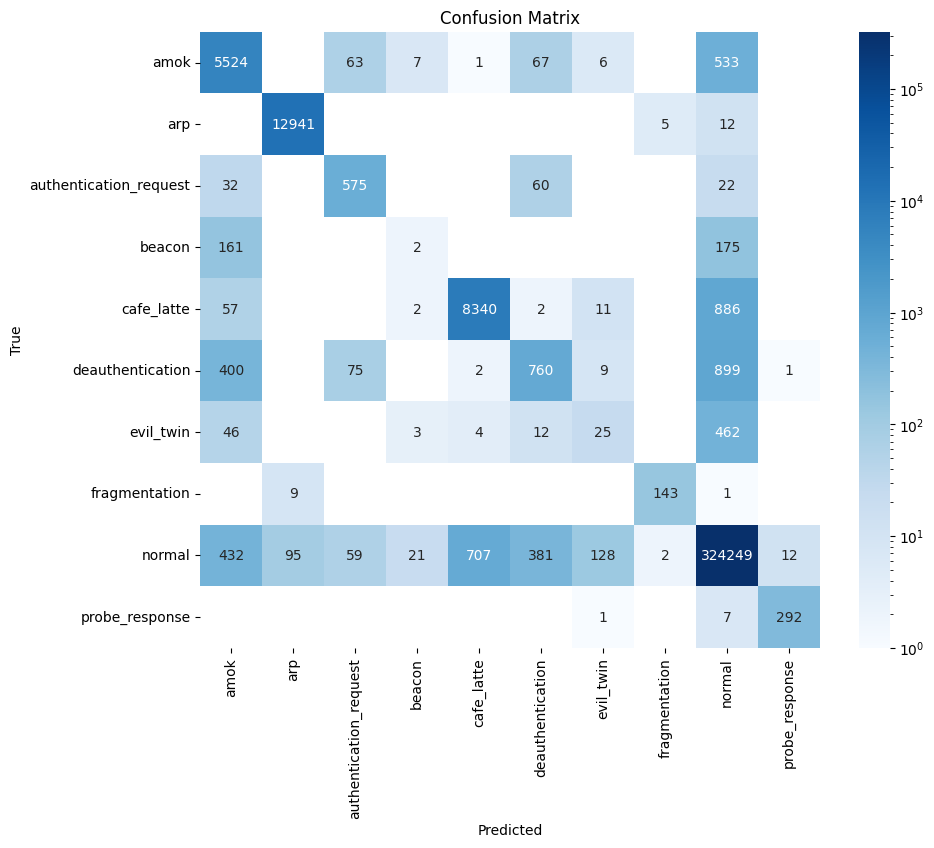

In [48]:
# Plot the confusion matrix with logarithmic colormap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', norm=LogNorm(), xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## RandomUnderSampler

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Option 1: Using SMOTE for oversampling the minority class
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Option 2: Using RandomUnderSampler for undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Option 3: Using SMOTEENN for combined over- and undersampling
# smoteenn = SMOTEENN(random_state=42)
# X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

# Train the Random Forest classifier with class weights
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = clf.predict(X_test)

# Get the inverse transform of the labels to obtain class names
target_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.8838456627852844
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      6236
           1       0.98      0.95      0.97     12922
           2       0.62      0.94      0.75       700
           3       0.02      0.54      0.05       360
           4       0.69      0.97      0.81      9178
           5       0.14      0.65      0.22      2089
           6       0.02      0.57      0.03       527
           7       0.16      0.95      0.28       154
           8       1.00      0.88      0.94    326244
           9       0.70      1.00      0.82       311

    accuracy                           0.88    358721
   macro avg       0.50      0.82      0.56    358721
weighted avg       0.98      0.88      0.92    358721



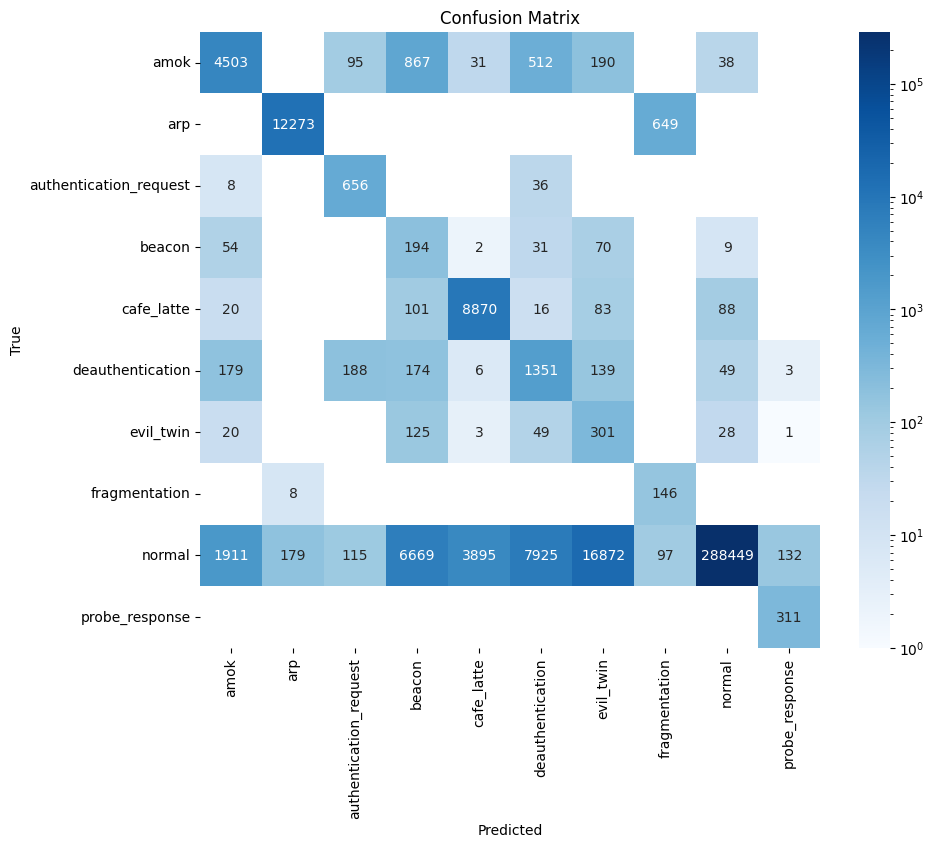

In [50]:
# Plot the confusion matrix with logarithmic colormap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', norm=LogNorm(), xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Normal & Anomal Detection

In [53]:
from os import cpu_count
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


# Read in preprocessed AWID dataset
data = pd.read_csv(
    'preproc_dataset.zip', sep=',', compression='zip')

In [54]:
desired_cols = [
    2, 5, 45, 62, 64, 65, 68, 71, 74, 75, 88, 91, 92, 105, 106, 110, 116, 120,
    154
]

# Read specific columns of CSV file from ZIP file in resources directory
data = pd.read_csv(
    "/kaggle/input/802-11-network-attack-detection/dataset.csv",
    sep=',',
    header=None,
    usecols=desired_cols)
col_names = [columns[i] for i in desired_cols]
# Set the column headers to the names from the Wireshark frame
data.columns = col_names

# Replace the '?' string in the DataFrame with a NumPy NaN value
data.replace('?', np.nan, inplace=True)

# If over 60% of the values in a column is null, remove it
prev_num_cols = len(data.columns)
data.dropna(axis='columns', thresh=len(data.index) * 0.40, inplace=True)
print("Removed " + str(prev_num_cols - len(data.columns)) +
      " columns with all NaN values.")

# Drop the rows that have at least one NaN value in it
old_num_rows = data.shape[0]
data.dropna(inplace=True)
print("Removed " + str(old_num_rows -
                       data.shape[0]) + " rows with at least one NaN value in it.") 



# Output the minimized dataset to a CSV file (with no index column added)
data.to_csv("min_dataset.csv", sep=',', index=False)

/tmp/ipykernel_34/1246263497.py:7: DtypeWarning: Columns (45,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(


Removed 7 columns with all NaN values.
Removed 1972 rows with at least one NaN value in it.


In [55]:
data

,frame.offset_shift,frame.time_delta_displayed,radiotap.flags.shortgi,radiotap.rxflags.badplcp,wlan.fc.version,wlan.fc.type,wlan.fc.frag,wlan.fc.moredata,wlan.duration,wlan.ra,wlan.fcs_good,class
0,0.0,0.000000,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
1,0.0,0.024271,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
2,0.0,0.001631,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
3,0.0,0.055325,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
4,0.0,0.000415,0,0,0,2,0,0,44,28:c6:8e:86:d3:d6,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
1795570,0.0,0.000006,0,0,0,1,0,0,0,c0:18:85:94:b6:55,1,normal
1795571,0.0,0.005067,0,0,0,0,0,0,0,ff:ff:ff:ff:ff:ff,1,normal
1795572,0.0,0.010242,0,0,0,2,0,0,44,28:c6:8e:86:d3:d6,1,normal
1795573,0.0,0.000007,0,0,0,1,0,0,0,20:64:32:54:c9:da,1,normal


### Train model

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('min_dataset.csv')

# Encode 'wlan.ra' using LabelEncoder
le_ra = LabelEncoder()
data['wlan.ra'] = le_ra.fit_transform(data['wlan.ra'])

# Encode 'class' where 'normal' is 0 and all other classes are 1
data['class'] = data['class'].apply(lambda x: 0 if x == 'normal' else 1)

# Define features and target
X = data.drop(columns=['class'])
y = data['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Anomaly detection
anomalies = X_test[y_pred == 1]

print("Number of anomalies detected:", len(anomalies))
print("Anomalies:\n", anomalies)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    326086
           1       0.94      0.91      0.92     32635

    accuracy                           0.99    358721
   macro avg       0.97      0.95      0.96    358721
weighted avg       0.99      0.99      0.99    358721

[[324195   1891]
 [  2932  29703]]
Number of anomalies detected: 31594
Anomalies:
          frame.offset_shift  frame.time_delta_displayed  \
579358                  0.0                    0.001080   
1579483                 0.0                    0.000813   
1237546                 0.0                    0.002079   
1500907                 0.0                    0.001293   
466524                  0.0                    0.000572   
...                     ...                         ...   
1452756                 0.0                    0.001023   
1451978                 0.0                    0.000884   
669884                  0.0                    0.001482   


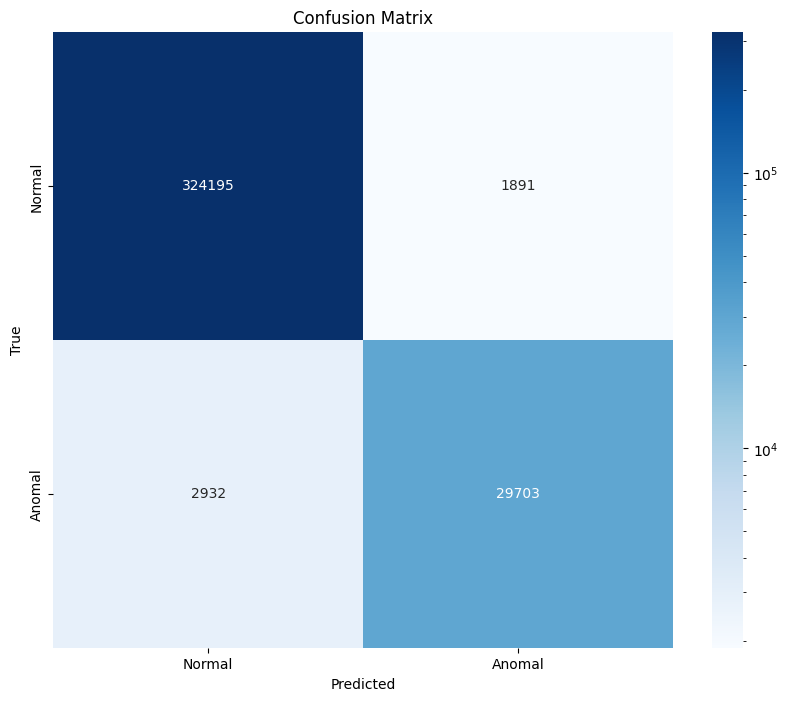

In [57]:
target_names = ["Normal", "Anomal"]
# Plot the confusion matrix with logarithmic colormap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', norm=LogNorm(), xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
import joblib
joblib.dump(rf_model, 'rf_anomaly_detection.pkl')

['rf_anomaly_detection.pkl']

## Attack Classification Detection From Anomal

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('min_dataset.csv')

# Drop the normal class
data_anomalies = data[data['class'] != 'normal']

# Encode 'wlan.ra' using LabelEncoder
le_ra = LabelEncoder()
data_anomalies['wlan.ra'] = le_ra.fit_transform(data_anomalies['wlan.ra'])

# Encode the 'class' column
le_class = LabelEncoder()
data_anomalies['class'] = le_class.fit_transform(data_anomalies['class'])

# Define features and target
X = data_anomalies.drop(columns=['class'])
y = data_anomalies['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=le_class.classes_))
print(confusion_matrix(y_test, y_pred))

# Identified classes
identified_classes = le_class.inverse_transform(y_pred)
print("Identified Classes:\n", identified_classes)


/tmp/ipykernel_34/3646659825.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_anomalies['wlan.ra'] = le_ra.fit_transform(data_anomalies['wlan.ra'])
/tmp/ipykernel_34/3646659825.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_anomalies['class'] = le_class.fit_transform(data_anomalies['class'])


                        precision    recall  f1-score   support

                  amok       0.94      0.71      0.81      6256
                   arp       1.00      0.97      0.98     12949
authentication_request       0.74      0.95      0.83       696
                beacon       0.12      0.54      0.20       343
            cafe_latte       1.00      0.98      0.99      9206
      deauthentication       0.68      0.68      0.68      2043
             evil_twin       0.40      0.65      0.49       545
         fragmentation       0.22      0.91      0.36       139
        probe_response       0.98      1.00      0.99       300

              accuracy                           0.89     32477
             macro avg       0.68      0.82      0.70     32477
          weighted avg       0.94      0.89      0.91     32477

[[ 4456     0   108   897    20   544   231     0     0]
 [    0 12505     0     0     0     0     0   444     0]
 [    6     0   660     0     0    30     0     0  

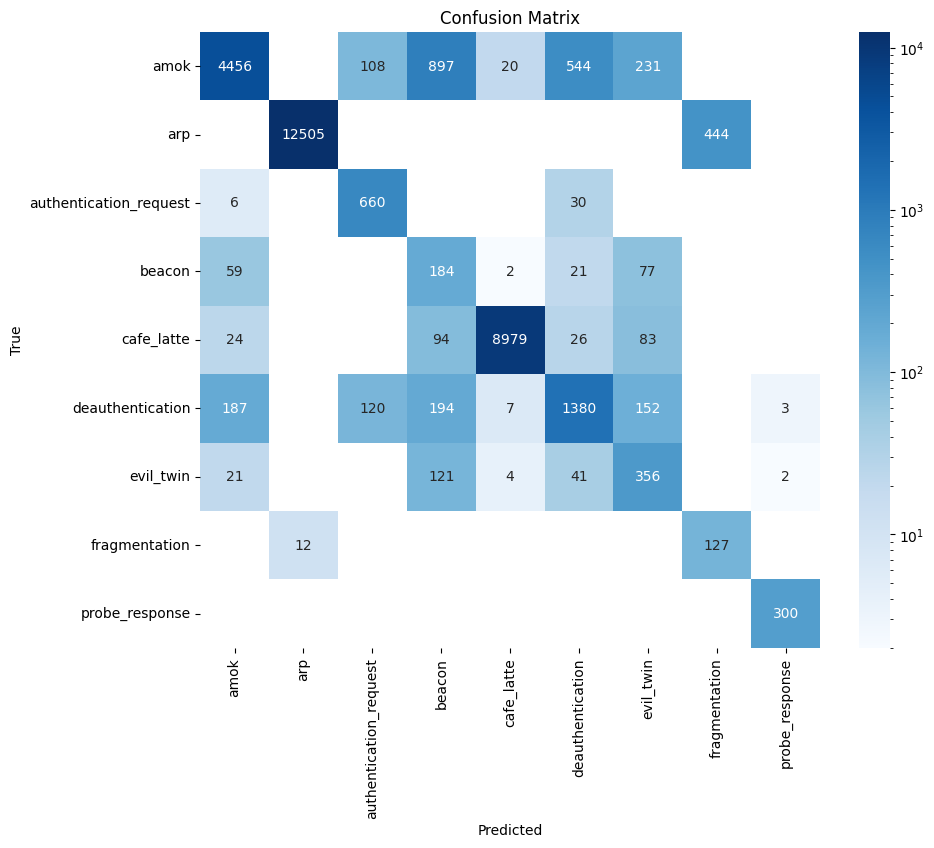

In [62]:
target_names = le_class.inverse_transform(range(len(le_class.classes_)))

# Plot the confusion matrix with logarithmic colormap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', norm=LogNorm(), xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
import joblib
joblib.dump(rf_model, 'rf_anomaly_classification.pkl')

['rf_anomaly_classification.pkl']